# Logistic Regression
In aceasta lectie ne vom uita peste o implementare a algoritmului de clasificare lineara - logistic regression.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Descarcam setul de date de pe repositoria cursului:

In [2]:
!mkdir data && curl -o data/bank.csv -LJO https://github.com/dianaartiom/machine_learning_with_python/raw/main/lesson06/notebooks/data/bank.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  450k  100  450k    0     0   537k      0 --:--:-- --:--:-- --:--:-- 10.0M


Incarcam setul de date cu ajutorul pandas. Mai multe informatii despre setul de date pot fi gasite aici: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

In [241]:
# load data
bank_df = pd.read_csv('data/bank.csv', sep = ';')
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [242]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [243]:
bank_df['job'].value_counts()

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64

In [244]:
bank_df = bank_df.replace({'yes' : 1, 'no' : 0})
bank_df = pd.get_dummies(bank_df, columns=['job', 'marital', 'education', 'contact', 'month', 'poutcome'])
bank_df.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,0,1787,0,0,19,79,1,-1,0,...,0,0,0,0,1,0,0,0,0,1
1,33,0,4789,1,1,11,220,1,339,4,...,0,0,1,0,0,0,1,0,0,0
2,35,0,1350,1,0,16,185,1,330,1,...,0,0,0,0,0,0,1,0,0,0
3,30,0,1476,1,1,3,199,4,-1,0,...,1,0,0,0,0,0,0,0,0,1
4,59,0,0,1,0,5,226,1,-1,0,...,0,0,1,0,0,0,0,0,0,1


In [246]:
bank_df.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration',
       'campaign', 'pdays', 'previous', 'y', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'education_unknown', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

In [210]:
def sigmoid(X, b):
    epsilon = 1e-5
    z = np.dot(X, b) + epsilon # to avoid numeric inconsistencies
    return np.exp(z) / (1 + np.exp(z))

def loss(X, y, b):
    y_hat = sigmoid(X, b)
    cost = (-y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat)).mean().values[0]
    return cost

In [211]:
def update(X, y, b, alpha):
    y_hat = sigmoid(X, b)
    b = b + alpha * np.dot(X.T, y - y_hat)
    return b

In [212]:
def plot_loss(val, xlabel='Epochs', ylabel='Cost'):
    plt.plot(val)
    plt.xlabel(xlabel=xlabel)
    plt.ylabel(ylabel=ylabel)
    plt.show()

def plot_losses(train_loss, test_loss, xlabel='Epochs', ylabel='Cost'):
    plt.plot(train_loss)
    plt.plot(test_loss)
    plt.xlabel(xlabel=xlabel)
    plt.ylabel(ylabel=ylabel)
    plt.legend(['loss train','loss test'])
    plt.show()

In [213]:
def learn_logistic_regression(X_train, y_train, alpha, epochs):
    b = np.zeros((X.shape[1], 1))
    train_loss, test_loss = [], []

    for epoch in range(0, epochs):
        # for i in range(len(X)):
        #     b = update(X.iloc[i:i+1], y.iloc[i:i+1], b, alpha)    
        
        b = update(X_train, y_train, b, alpha)
        
        train_loss.append(loss(X_train, y_train, b))
        test_loss.append(loss(X_test, y_test, b))
        
    
    plot_losses(train_loss, test_loss)

    return b

In [214]:
X = bank_df.loc[:, bank_df.columns != 'y']
y = bank_df[['y']]

In [215]:
from sklearn.preprocessing import MinMaxScaler
mm_scaler = MinMaxScaler()
X = mm_scaler.fit_transform(X)

In [216]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [217]:
a = 0.00001
epochs = 100

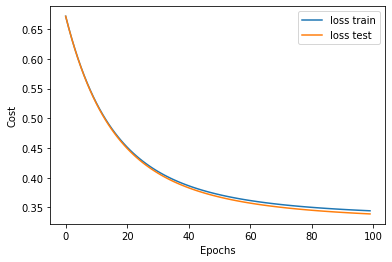

In [218]:
b = learn_logistic_regression(X, y, a, epochs)

In [200]:
y_pred =  sigmoid(X_train, b) > 0.5 * np.ones(y_train.shape[0]).reshape(y_train.shape) # predictions > 0.5
accuracy_score(y_train, y_pred)

0.8775811209439528

In [201]:
y_pred =  sigmoid(X_test, b) > 0.5 * np.ones(y_test.shape[0]).reshape(y_test.shape) # predictions > 0.5
accuracy_score(y_test, y_pred)

0.8955223880597015

Sa facem o mica calatorie prin metricile noastre si sa intelegem ce reprezinta fiecare dintre acestea.

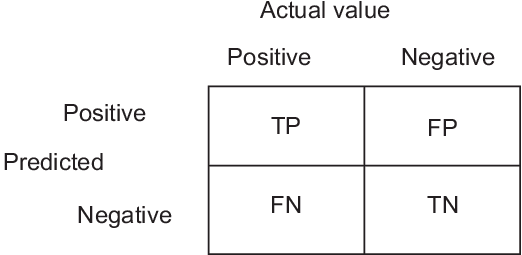

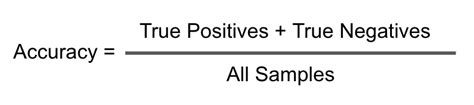

Uneori poate fi mai convenabil sa intelegem metrici precum precision si/sau recall. Acestea se calculeaza ca: 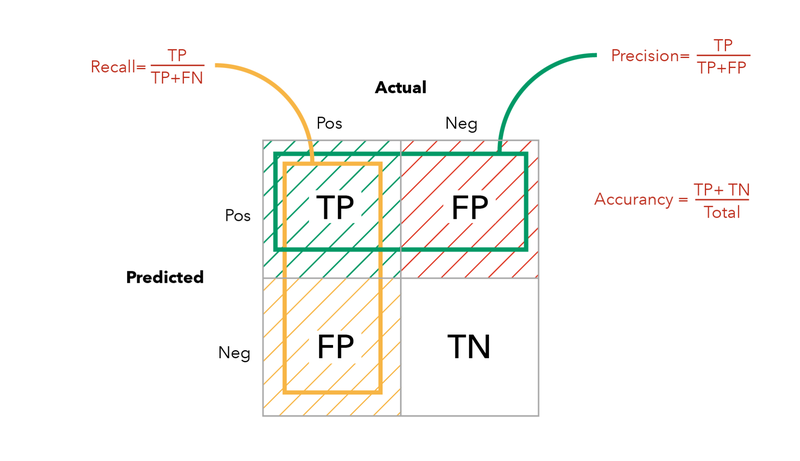

In [257]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve, classification_report, accuracy_score, confusion_matrix, recall_score, precision_score
import seaborn as sns

In [250]:
scaler = StandardScaler()
lr = LogisticRegression() # nu pasam parametri de intrare -> se folosesc valorile implicite (default)
model1 = Pipeline([('standardize', scaler),
                    ('log_reg', lr)])

In [251]:
model1.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('standardize', StandardScaler()),
                ('log_reg', LogisticRegression())])

In [260]:
y_train_hat = model1.predict(X_train) # predict the actual label, i.e. 0 or 1
y_train_hat_probs = model1.predict_proba(X_train)[:,1] # predict the probability

train_accuracy = accuracy_score(y_train, y_train_hat)*100
train_auc_roc = roc_auc_score(y_train, y_train_hat_probs)*100

print('Confusion matrix:\n', confusion_matrix(y_train, y_train_hat))

print('Training AUC: %.4f %%' % train_auc_roc)

print('Training accuracy: %.4f %%' % train_accuracy)

print('Recall score: %.4f %%' % (recall_score(y_train, y_train_hat)*100))

print('Precision score: %.4f %%' % (precision_score(y_train, y_train_hat)*100))

Confusion matrix:
 [[2737   58]
 [ 230  139]]
Training AUC: 90.4646 %
Training accuracy: 90.8976 %
Recall score: 37.6694 %
Precision score: 70.5584 %


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


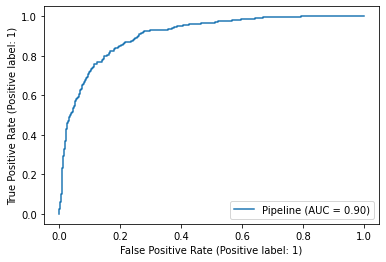

In [255]:
plot_roc_curve(model1, X_train, y_train) 

ROC curve (receiver operating characteristic curve) este un grafic care prezintă performanța unui model de clasificare la toate pragurile de clasificare. Această curbă trasează doi parametri:
- True Positive Rate
- False Positive Rate

True Positive Rate (TPR) este un sinonim pentru recall și, prin urmare, se definește după cum urmează:

\begin{equation}TPR = \frac{TP}{TP+FN}\end{equation}

False Positive Rate este definită după cum urmează:

\begin{equation}TPR = \frac{FP}{FP+TN}\end{equation}

O curbă ROC prezintă TPR vs. FPR la diferite praguri de clasificare. Scăderea pragului de clasificare clasifică mai multe elemente ca fiind pozitive, crescând astfel atât numărul de False Positives, cât și cel de True Positives. Următoarea figură prezintă o curbă ROC tipică.

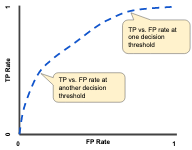

Pentru a calcula punctele unei curbe ROC, am putea evalua un model de regresie logistică de mai multe ori cu diferite praguri de clasificare, dar acest lucru ar fi ineficient. Din fericire, există un algoritm eficient, bazat pe sortare, care ne poate furniza aceste informații, numit AUC.

AUC înseamnă "Area under the ROC Curve" (aria sub curba ROC). Adică, AUC măsoară întreaga zonă bidimensională de sub întreaga curbă ROC (gândiți-vă la calculul integral) de la (0,0) la (1,1).

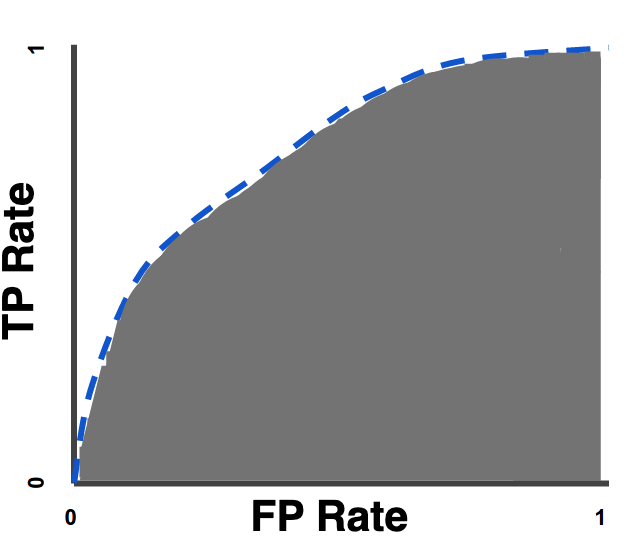

In [261]:
y_test_hat = model1.predict(X_test) # predict the actual label, i.e. 0 or 1
y_test_hat_probs = model1.predict_proba(X_test)[:,1] # predict the probability

test_accuracy = accuracy_score(y_test, y_test_hat)*100
test_auc_roc = roc_auc_score(y_test, y_test_hat_probs)*100

print('Confusion matrix:\n', confusion_matrix(y_test, y_test_hat))

print('Testing AUC: %.4f %%' % test_auc_roc)

print('Testing accuracy: %.4f %%' % test_accuracy) 

print('Recall score: %.4f %%' % (recall_score(y_train, y_train_hat)*100))

print('Precision score: %.4f %%' % (precision_score(y_train, y_train_hat)*100))

Confusion matrix:
 [[1168   37]
 [ 101   51]]
Testing AUC: 88.5565 %
Testing accuracy: 89.8305 %
Recall score: 37.6694 %
Precision score: 70.5584 %


1. Pentru a revedea teoria logistic regression poti face referire la cartea lui Kevin Murphy: Machine Learning, a probabilistic approach. Link aici: http://noiselab.ucsd.edu/ECE228/Murphy_Machine_Learning.pdf

2. Informatie despre confusion matrix: https://medium.com/analytics-vidhya/what-is-a-confusion-matrix-d1c0f8feda5

3. Mai multe informatii despre taskul de clasificare: https://developers.google.com/machine-learning/crash-course/classification/video-lecture
